In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model=LinearRegression()

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

In [2]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# To Pandas datetime
train['datetime'] = pd.to_datetime(train['datetime'])

In [5]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

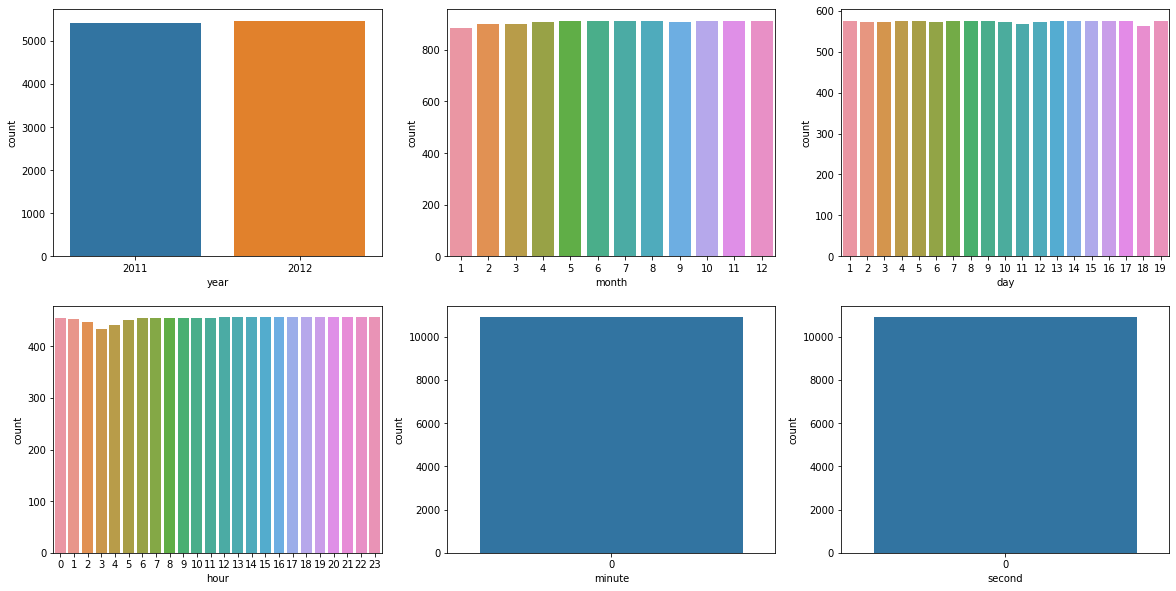

In [6]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)
sns.countplot(x='year', data=train, ax=ax1)
sns.countplot(x='month', data=train, ax=ax2)
sns.countplot(x='day', data=train, ax=ax3)
sns.countplot(x='hour', data=train, ax=ax4)
sns.countplot(x='minute', data=train, ax=ax5)
sns.countplot(x='second', data=train, ax=ax6)


In [7]:
# X,y 
X = train[['season','holiday','workingday','weather', 'temp','atemp','humidity']].values
y = train['count'].values


In [8]:
# Train/Test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=55)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7075, 7) (7075,)
(3811, 7) (3811,)


In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
predictions = model.predict(X_test)
predictions

array([207.42676694,  91.07507577, 153.49666672, ..., 257.21917412,
       367.68525886, 368.4862248 ])

In [11]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

23404.014350717047

In [12]:
#rmse = Root square of MSE
import math
RMSE = math.sqrt(mse)
RMSE

152.98370616087533

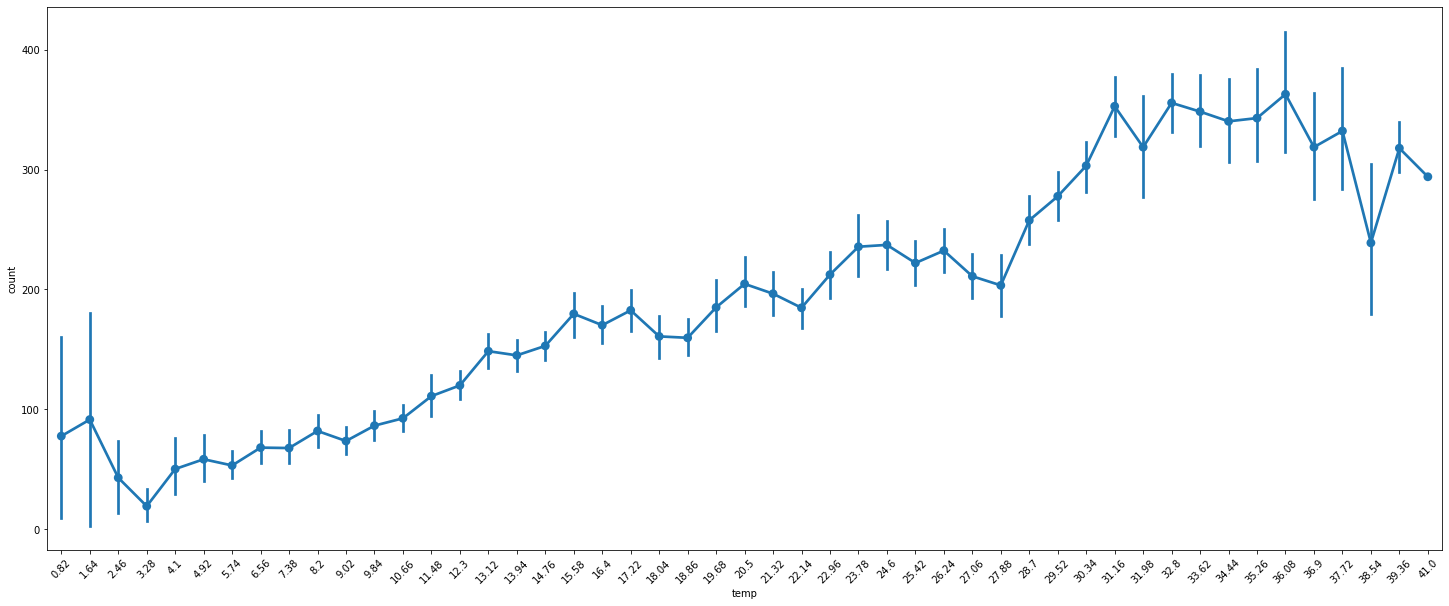

In [13]:
# X = temp / y = count
for feature in ['temp'] :
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.pointplot(x = feature, y = 'count', data = train)
    plt.xticks(rotation=45)
    plt.show()

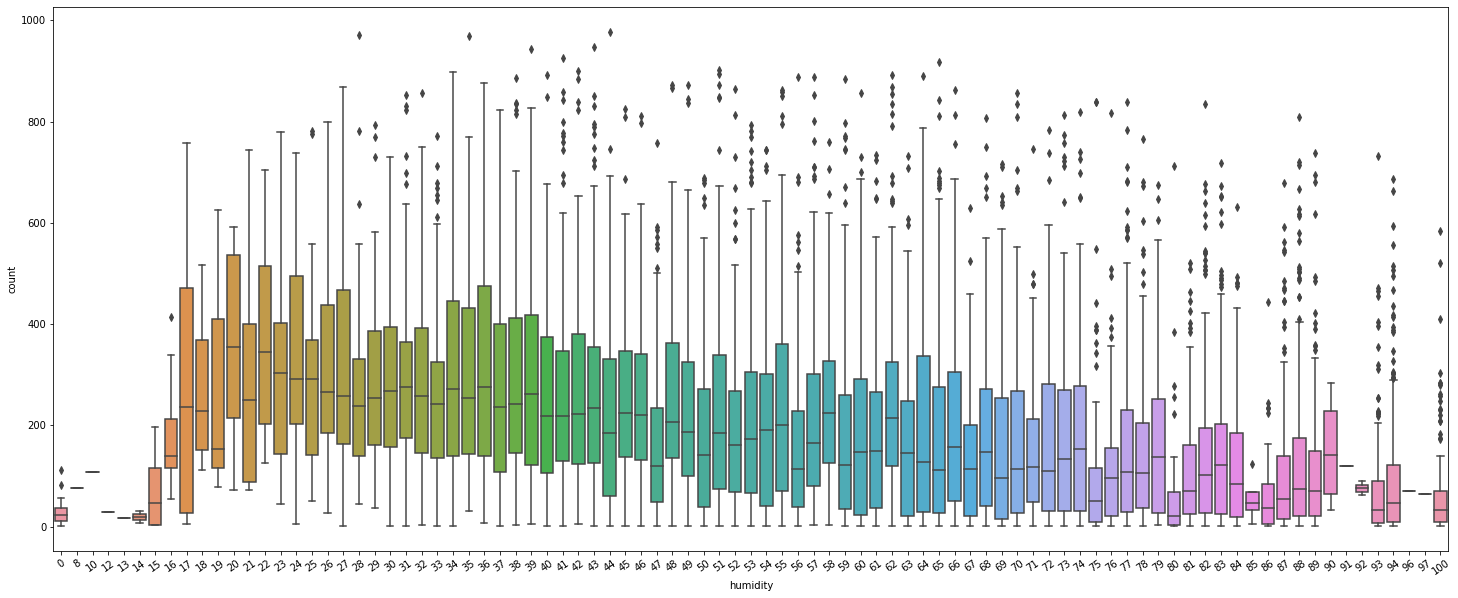

In [14]:
# X = humidity / y = count
for feature in ['humidity'] :
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.boxplot(x = feature, y = 'count', data = train)
    plt.xticks(rotation=35)
    plt.show()